In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

##### 13.
> This question should be answered using the `Weekly` data set, which is part of the `ISLP` package. This data is similar in nature to the `Smarket` data from this chapter's lab, except that it contains $1,089$ weekly returns for $21$ years, from the beginning of $1990$ to the end of $2010$.

In [2]:
Weekly_df = load_data('Weekly')
Weekly_df

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up
...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up


> (a) Produce some numerical and graphical summary of the `Weekly` data. Do there appear to be any patterns?

In [3]:
corr_mat = Weekly_df.corr(numeric_only=True)
corr_mat

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


In [4]:
corr_mat.where(corr_mat >= 0.01)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,NaN,NaN,NaN,NaN,NaN,0.841942,NaN
Lag1,NaN,1.000000,NaN,0.058636,NaN,NaN,NaN,NaN
Lag2,NaN,NaN,1.000000,NaN,0.058382,NaN,NaN,0.059167
Lag3,NaN,0.058636,NaN,1.000000,NaN,0.060657,NaN,NaN
Lag4,NaN,NaN,0.058382,NaN,1.000000,NaN,NaN,NaN
Lag5,NaN,NaN,NaN,0.060657,NaN,1.000000,NaN,0.011013
Volume,0.841942,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Today,NaN,NaN,0.059167,NaN,NaN,0.011013,NaN,1.000000


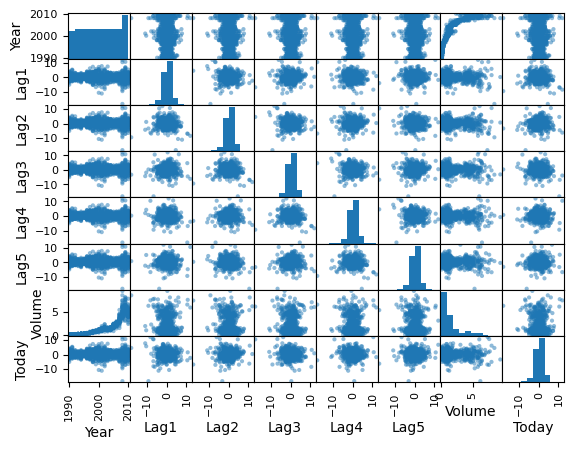

In [5]:
pd.plotting.scatter_matrix(Weekly_df);

**A:** From the *correlation matrix*, we can see that only `Year` has a significant correlation to `Volume`. Exponential relationship as shown by the graph. <br>
There is also some correlation between any day and the day 2 days after (e.g. day $1$ to $3$, or $2$ to $4$). <br>
Relationship between all other variables are not significant. 

> (b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [6]:
allvars = Weekly_df.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Weekly_df)
y = Weekly_df.Direction == 'Up'
glm = sm.GLM(y, X, family=sm.families.Binomial())
logistic_model = glm.fit()
summarize(logistic_model)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


In [7]:
def get_significant_predictors(summary_df, threshold=0.05):
    """Get rows with significant p-value from DataFrame"""
    return summary_df.loc[summary_df[summary_df.columns[-1]] <= threshold]

def get_accuracy(confusion_mat):
    return (np.trace(confusion_mat) / 
            np.sum(confusion_mat.to_numpy())).round(decimals=4)

def get_false_positive_rate(confusion_mat):
    return (confusion_mat.iloc[1, 0] /
            np.sum(confusion_mat.iloc[:, 0])).round(decimals=4)

def get_false_negative_rate(confusion_mat):
    return (confusion_mat.iloc[0, 1] /
            np.sum(confusion_mat.iloc[:, 1])).round(decimals=4)

In [8]:
get_significant_predictors(summarize(logistic_model))

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag2,0.0584,0.027,2.175,0.030


**A:** Only `Lag2` has a significant $p$-value.

> (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about th types of mistakes made by logistic regression.

In [9]:
probs = logistic_model.predict(exog=X)
labels = np.full(1089, False)  # shape of y_test
labels[probs>0.5] = True
confusion_mat = confusion_table(labels, y)
confusion_mat

Truth,False,True
Predicted,,
False,54,48
True,430,557


In [10]:
print(f'Total accuracy: {get_accuracy(confusion_mat)}')
print(f'False positive: {get_false_positive_rate(confusion_mat)}')
print(f'False negative: {get_false_negative_rate(confusion_mat)}')

Total accuracy: 0.5611
False positive: 0.8884
False negative: 0.0793


In [11]:
# find null rate
null = np.full(1089, True)  # shape of y_test
null_confusion_mat = confusion_table(null, y)
print(f'Null total accuracy: {get_accuracy(null_confusion_mat)}')
print(f'Null false positive: {get_false_positive_rate(null_confusion_mat)}')
print(f'Null false negative: {get_false_negative_rate(null_confusion_mat)}')

Null total accuracy: 0.5556
Null false positive: 1.0
Null false negative: 0.0


**A:** The model achieve $56\%$ accuracy. This is exactly as the *null* rate. *False positive* rate is very high, suggesting that it's misclassifying `Down` as `Up`. Misclassification of `Up` as `Down` is much smaller as *false negative* suggests. The model is good at identifying `Up`.

> (d) Now fit the logistic regression model using a training data period from $1990$ to $2008$, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from $2009$ and $2010$).

In [12]:
design = MS(['Lag2'])
X = design.fit_transform(Weekly_df)

train = (Weekly_df.Year <= 2008)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
y_test.shape

(104,)

In [13]:
def get_predictions(fitted_model, X_test, y_test, threshold=0.5):
    # get predictions based on threshold
    # also works for 0, 1 encoding
    probs = fitted_model.predict(X_test)
    predictions = np.full(y_test.shape[0], False)
    predictions[probs >= threshold] = True
    return predictions

def get_lr_predictions(X_train, X_test, y_train, y_test, threshold=0.5):
    logistic_model = sm.GLM(y_train, X_train,
                            family=sm.families.Binomial()).fit()
    predictions = get_predictions(logistic_model, X_test, y_test, threshold)
    confusion_mat = confusion_table(predictions, y_test)
    return confusion_mat

confusion_mat = get_lr_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Total accuracy: {get_accuracy(confusion_mat)}')
confusion_mat

Total accuracy: 0.625


Truth,False,True
Predicted,,
False,9,5
True,34,56


> (e) Repeat $(d)$ using LDA.

In [14]:
def get_lda_predictions(X_train, X_test, y_train, y_test, threshold=0.5):
    lda_model = LDA(store_covariance=True)
    X_train_lda, X_test_lda = [M.drop(columns=['intercept'])
                               for M in [X_train, X_test]]
    lda_model.fit(X_train_lda, y_train)
    predictions = get_predictions(lda_model, X_test_lda, y_test, threshold)
    confusion_mat = confusion_table(predictions, y_test)
    return confusion_mat

confusion_mat = get_lda_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Total accuracy: {get_accuracy(confusion_mat)}')
confusion_mat


Total accuracy: 0.625


Truth,False,True
Predicted,,
False,9,5
True,34,56


> (f) Repeat $(d)$ using QDA.

In [15]:
def get_qda_predictions(X_train, X_test, y_train, y_test, threshold=0.5):
    qda_model = QDA(store_covariance=True)
    X_train_qda, X_test_qda = [M.drop(columns=['intercept'])
                               for M in [X_train, X_test]]
    qda_model.fit(X_train_qda, y_train)
    predictions = get_predictions(qda_model, X_test_qda, y_test, threshold)
    confusion_mat = confusion_table(predictions, y_test)
    return confusion_mat

confusion_mat = get_qda_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Total accuracy: {get_accuracy(confusion_mat)}')
confusion_mat


Total accuracy: 0.5865


Truth,False,True
Predicted,,
False,0,0
True,43,61


> (f) Repeat $(d)$ using KNN with $K = 1$.

In [16]:
def get_knn_predictions(X_train, X_test, y_train, y_test,
                        n_neighbors=1):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    X_train_knn1, X_test_knn1 = [np.asarray(X) for X in (X_train, X_test)]
    knn.fit(X_train_knn1, y_train)
    predictions = knn.predict(X_test_knn1)
    confusion_mat = confusion_table(predictions, y_test)
    return confusion_mat

confusion_mat = get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=1)
print(f"Total accuracy: {get_accuracy(confusion_mat)}")
confusion_mat

Total accuracy: 0.5


Truth,False,True
Predicted,,
False,21,30
True,22,31


> (h) Repeat $(d)$ using naive Bayes.

In [17]:
def get_nb_predictions(X_train, X_test, y_train, y_test):
    NB = GaussianNB()
    NB.fit(X_train, y_train)
    predictions = NB.predict(X_test)
    confusion_mat = confusion_table(predictions, y_test)
    return confusion_mat

confusion_mat = get_nb_predictions(X_train, X_test, y_train, y_test)
print(f'Total accuracy: {get_accuracy(confusion_mat)}')
confusion_mat 

Total accuracy: 0.5865


Truth,False,True
Predicted,,
False,0,0
True,43,61


> (i) Which of these methods appears to provide the best results on this data?

**A:** *Logistic* and *LDA* provide the best results.

> (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for *K* in the KNN classifier.

In [18]:
allvars = Weekly_df.columns.drop(['Today', 'Direction'])
design = MS(allvars)
X = design.fit_transform(Weekly_df)

train = (Weekly_df.Year <= 2008)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

In [19]:
# Full variables set
models = {
    'lr_full': get_lr_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'lda_full': get_lda_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'qda_full': get_qda_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'knn1_full': get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=1),
    'nb_full': get_nb_predictions(X_train, X_test, y_train, y_test),
}

null = np.full(y_test.shape[0], True)  # shape of y_test
null_confusion_mat = confusion_table(null, y_test)
print(f'Null total accuracy: {get_accuracy(null_confusion_mat)}')
print(null_confusion_mat)
print()

for model_name, confusion_mat in models.items():
    print(model_name)
    print(f'Total accuracy: {get_accuracy(confusion_mat)}')
    print(confusion_mat)
    print()

Null total accuracy: 0.5865
Truth      False  True 
Predicted              
False          0      0
True          43     61

lr_full
Total accuracy: 0.4519
Truth      False  True 
Predicted              
False         30     44
True          13     17

lda_full
Total accuracy: 0.4519
Truth      False  True 
Predicted              
False         30     44
True          13     17

qda_full
Total accuracy: 0.4712
Truth      False  True 
Predicted              
False         38     50
True           5     11

knn1_full
Total accuracy: 0.4423
Truth      False  True 
Predicted              
False         25     40
True          18     21

nb_full
Total accuracy: 0.4231
Truth      False  True 
Predicted              
False         42     59
True           1      2



In [20]:
for k in range(1, 15):
    print(f'Current k: {k}')
    confusion_mat = get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=k)
    print(f'Total accuracy: {get_accuracy(confusion_mat)}')
    print(confusion_mat)
    print()

Current k: 1
Total accuracy: 0.4423
Truth      False  True 
Predicted              
False         25     40
True          18     21

Current k: 2
Total accuracy: 0.4231
Truth      False  True 
Predicted              
False         35     52
True           8      9

Current k: 3
Total accuracy: 0.5
Truth      False  True 
Predicted              
False         24     33
True          19     28

Current k: 4
Total accuracy: 0.4808
Truth      False  True 
Predicted              
False         32     43
True          11     18

Current k: 5
Total accuracy: 0.5
Truth      False  True 
Predicted              
False         25     34
True          18     27

Current k: 6
Total accuracy: 0.4904
Truth      False  True 
Predicted              
False         33     43
True          10     18

Current k: 7
Total accuracy: 0.4904
Truth      False  True 
Predicted              
False         22     32
True          21     29

Current k: 8
Total accuracy: 0.4808
Truth      False  True 
Predicted      

In [21]:
# add Lag2 helps improve the models quite well
design = MS(['Lag1', 'Lag2'])
# design = MS(['Lag1'])
X = design.fit_transform(Weekly_df)
# Modify model to y = x0 + lag1 * Lag1 x1
X.Lag1 **= 2

train = (Weekly_df.Year <= 2008)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]

In [22]:
models = {
    'lr_quad': get_lr_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'lda_quad': get_lda_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'qda_quad': get_qda_predictions(X_train, X_test, y_train, y_test, threshold=0.5),
    'knn1_quad': get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=1),
    'nb_quad': get_nb_predictions(X_train, X_test, y_train, y_test),
}

null = np.full(y_test.shape[0], True)  # shape of y_test
null_confusion_mat = confusion_table(null, y_test)
print(f'Null total accuracy: {get_accuracy(null_confusion_mat)}')
print(null_confusion_mat)
print()

for model_name, confusion_mat in models.items():
    print(model_name)
    print(f'Total accuracy: {get_accuracy(confusion_mat)}')
    print(confusion_mat)
    print()

Null total accuracy: 0.5865
Truth      False  True 
Predicted              
False          0      0
True          43     61

lr_quad
Total accuracy: 0.6442
Truth      False  True 
Predicted              
False          8      2
True          35     59

lda_quad
Total accuracy: 0.6442
Truth      False  True 
Predicted              
False          8      2
True          35     59

qda_quad
Total accuracy: 0.5096
Truth      False  True 
Predicted              
False         32     40
True          11     21

knn1_quad
Total accuracy: 0.5192
Truth      False  True 
Predicted              
False         21     28
True          22     33

nb_quad
Total accuracy: 0.5
Truth      False  True 
Predicted              
False         30     39
True          13     22



**A:** There seems to be no improvement comparing to the *null* model when using all possible variables. Some model actually is worse than *null* or complete random guess. *Quadratic* relationship also does not help much. However, adding `Lag2` to the quadratic model of `Lag1` improved all model, with *Logistic* and *LDA* reach $64.42\%$.

##### 14.
> In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

> (a) Create a binary variable, `mpg01`, that contains a $1$ if `mpg` contains a value above its median, and a $0$ if `mpg` contains a value below its median. You can compte the median using the `median()` method of the data frame. Note you may find it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows:

In [23]:
# Auto['mpg01'] = mpg01

In [24]:
Auto_df = load_data('Auto')
Auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [25]:
mpg01 = (Auto_df.mpg > Auto_df.mpg.median()).astype(int)
Auto_df['mpg01'] = mpg01
Auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2,1
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1,1


> (b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

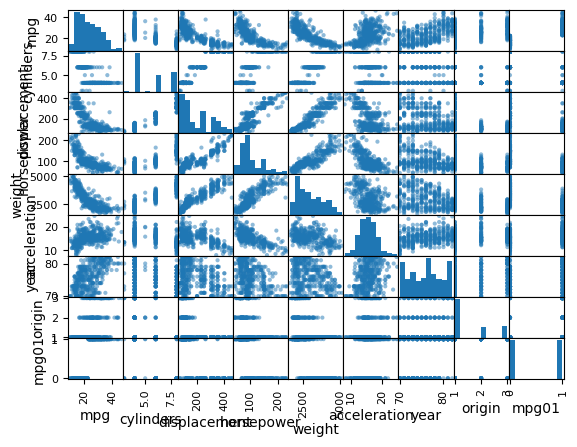

In [26]:
pd.plotting.scatter_matrix(Auto_df);

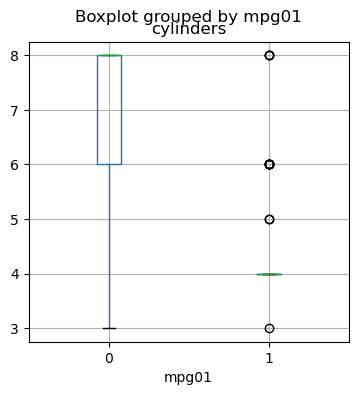

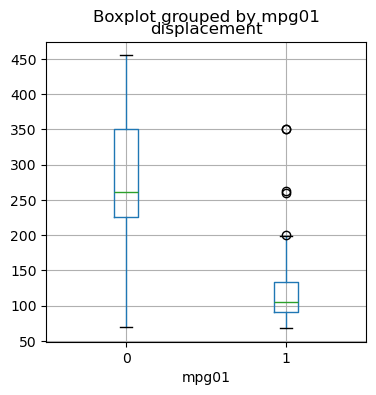

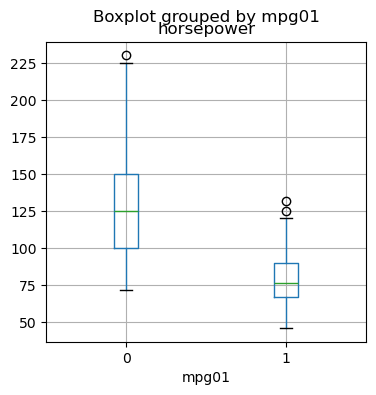

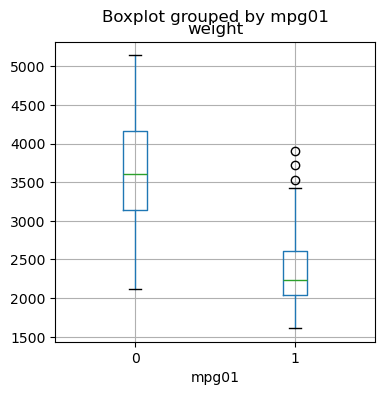

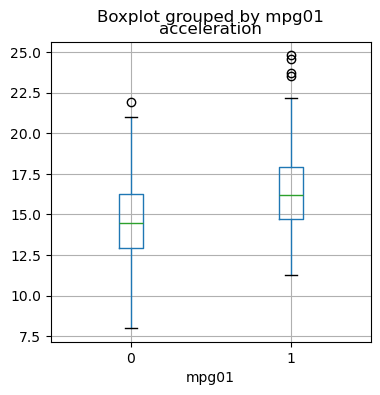

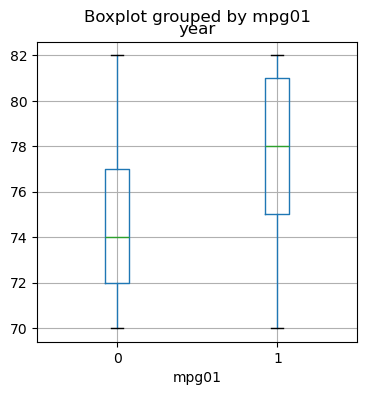

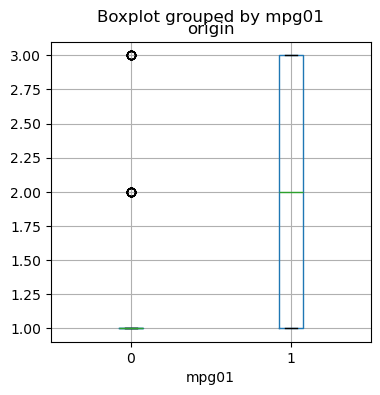

In [27]:
for column in Auto_df.columns.drop(['mpg', 'mpg01']):
    pd.plotting.boxplot(Auto_df, column=column, by='mpg01', figsize=(4, 4));

**A:** `cylinder`, `displacement`, `horsepower`, `weight` shows correlation to the response variable `mpg01`.

> (c) Split the data into a training set and a test set.

In [28]:
rng = np.random.default_rng(1)
train = rng.random(Auto_df.shape[0]) < 0.7  # choose % of the data for training
# Splitting can be done as following or separately in part (d)
# Auto_train = Auto_df.loc[train]
# Auto_test = Auto_df.loc[~train]

> (d) Perform LDA on the training data in order to predict `mgp01` using the variables that seemed most associated with `mgp01` in $(b)$. What is the test error of the model obtained?

In [29]:
predictors = ['cylinders', 'displacement', 'horsepower', 'weight']
design = MS(predictors)
X = design.fit_transform(Auto_df)
y = Auto_df.mpg01 == 1

X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
y_test.shape

(107,)

In [30]:
confusion_mat = get_lda_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
confusion_mat

Test error rate: 0.0841


Truth,False,True
Predicted,,
False,48,2
True,7,50


> (e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in $(b)$. What is the test error of the model obtained?

In [31]:
confusion_mat = get_qda_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
confusion_mat

Test error rate: 0.0654


Truth,False,True
Predicted,,
False,51,3
True,4,49


> (f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in $(b)$. What is the test error of the model obtained?

In [32]:
confusion_mat = get_lr_predictions(X_train, X_test, y_train, y_test, threshold=0.5)
print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
confusion_mat

Test error rate: 0.0748


Truth,False,True
Predicted,,
False,50,3
True,5,49


> (g) Perform naive Bayes on the training dat ain order to predict `mpg01` using the variables that seemed most associated with `mpg01` in $(b)$. What is the test error rate of the model obtained?

In [33]:
confusion_mat = get_nb_predictions(X_train, X_test, y_train, y_test)
print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
confusion_mat

Test error rate: 0.0654


Truth,False,True
Predicted,,
False,50,2
True,5,50


> (h) Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in $(b)$. What test errors do you obtained? Which values of $K$ seems to perform the bets on this data set?

In [34]:
ks = []
test_error_rates = []
for k in range(1, 80, 2):
    confusion_mat = get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=k)
    # print(f'k value: {k}')
    # print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
    # print(confusion_mat)
    # print()
    ks.append(k)
    test_error_rates.append(1 - get_accuracy(confusion_mat))

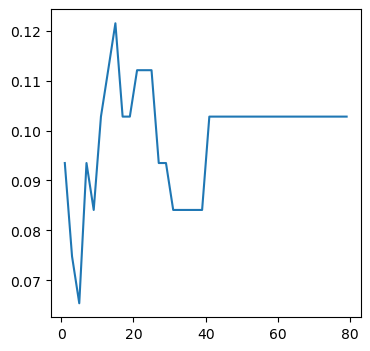

In [35]:
_, ax = subplots(figsize=(4, 4))
ax.plot(ks, test_error_rates);


**A:** The model performance fluctuates quite a lot. This is expected since the data set is quite small for possibly a complex relationship between predictors and the response. $K = 5$ has the best performance. Smaller k has a better performance overall, suggesting that the true relationship might not be linear. <br><br>With a small data set such as this, overfitting can be quite a problem, and it can be seen by adjusting the percentage of training to $85\%$ and retraining. All models error rate increase regardless of value of $k$,

##### 15.
> This problem involves writing functions.

> (a) Write a function, `Power()`, that prints out the result of raising $2$ to the $3^{rd}$ power. In other words, your function should compute $2^3$ and print out the results. <br><br> *Hint: Recall that `x**a` raises `x` to the power `a`. Use the `print()` function to display the result.*

In [36]:
def Power():
    print(2**3)

Power()

8


> (b) Create a new function, `Power2()`, that allows you to pass *any* two numbers, `x` and `a`, and prints out the values of `x**a`. You can do this by beginning your function with the same line: <br><br> `def Power2(x, a):` <br><br> You should eb able to call your function by entering, for instance, <br><br> `Power2(3, 8)` <br><br> on the command line. This should output the values of $3^8$, namely, $6,561$.

In [37]:
def Power2(x, a):
    print(x**a)

Power2(3, 8)

6561


> (c) Using the `Power2()` function that you just wrote, compute $10^3$, $8^{17}$, and $131^3$.

In [38]:
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

1000
2251799813685248
2248091


> (d) Now create a new function, `Power3()`, that actually *returns* the result `x**a` as a Python object, rather than simply printing it to the screen. That is, if you store the value `x**a` in an object called `result` within your function, then you can simply `return` this result, using the following line: <br><br> `return result` <br><br> Note that the line above should be the last line your function, and it should be indented $4$ spaces.

In [39]:
def Power3(x, a):
    # return without storing to `result` is also possible
    # return x ** a
    result = x ** a
    return result

answer = Power3(3, 8)
print(answer)

6561


> (e) Now using the `Power3()` function, create a plot of $f(x) = x^2$. The $x$-axis should display a range of integers from $1$ to $10$, and the $y$-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the $x$-axis, the $y$-axis, or both on the log-scale. You can do this by using the `ax.set_xscale()` and `ax.set_yscale()` methods of the axes you are plotting to.

Text(0.5, 1.0, 'Log scale y = x^2')

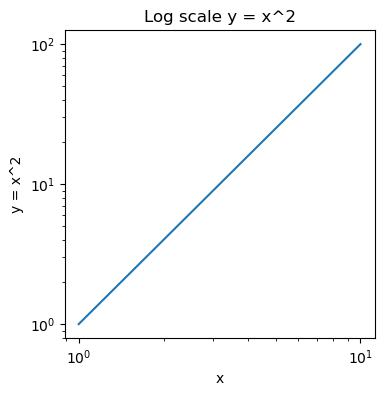

In [40]:
_, ax = subplots(figsize=(4,4))
xs = [i for i in range(1, 11)]
ys = [Power3(x, 2) for x in xs]
ax.plot(xs, ys)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('x')
ax.set_ylabel('y = x^2')
ax.set_title('Log scale y = x^2')

> (f) Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x**a` for a fixed `a` and a sequence of values of `x`. For instance, if you call <br><br> `PlotPower(np.arange(1, 11), 3)` <br><br> then a plot should be created with an $x$-axis taking on values $1,2,…, 10$, and a $y$-axis taking on values $1^3, 2^3, …, 10^3$.

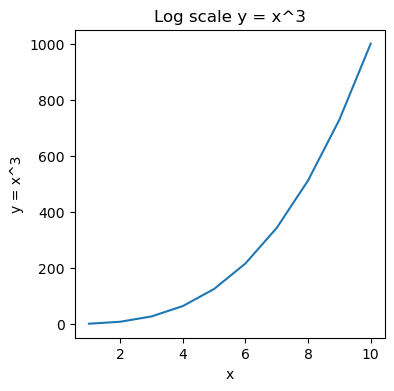

In [41]:
def PlotPower(arr, power):
    _, ax = subplots(figsize=(4,4))
    ys = [Power3(x, power) for x in arr]
    ax.plot(xs, ys)
    ax.set_xlabel('x')
    ax.set_ylabel(f'y = x^{power}')
    ax.set_title(f'Log scale y = x^{power}')

PlotPower(np.arange(1, 11), 3)

##### 16.
> Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the media. Explore logistic regression, LDA, and naive Bayes, and KNN models using various subsets of predictors. Describe your findings. <br><br> *Hint: You will have to create the response variable yourself, using the variables that are contained in the `Boston` data set.*

In [42]:
Boston_df = load_data('Boston')
Boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [52]:
median = Boston_df.crim.median()
crim01 = (Boston_df.crim >= median).astype(int)
Boston_df['crim01'] = crim01
Boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


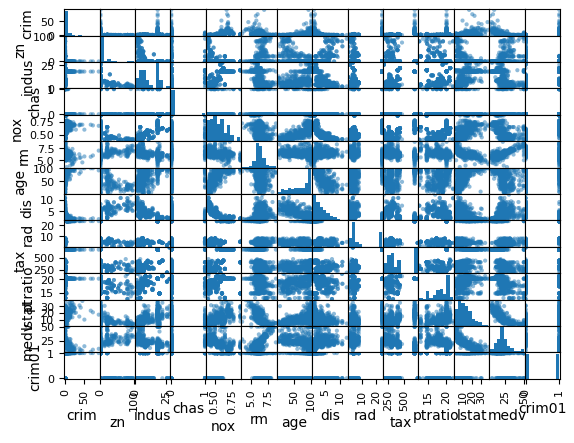

In [51]:
pd.plotting.scatter_matrix(Boston_df);

In [58]:
# Review relationship between each predictor and response variable
# for column in Boston_df.columns.drop(['crim', 'crim01']):
#     pd.plotting.boxplot(Boston_df, column=column, by='crim01', figsize=(4, 4))

In [66]:
def get_training_testing_set(dataset, predictors, response_var, percentage=0.8):
    # Segment dataset into training and testing sets
    # Segmentation `percentage`% to training
    design = MS(predictors)
    design = MS(predictors)
    X = design.fit_transform(dataset)
    y = dataset[response_var]

    train = rng.random(dataset.shape[0]) < percentage
    X_train, X_test = X.loc[train], X.loc[~train]
    y_train, y_test = y.loc[train], y.loc[~train]
    return X_train, X_test, y_train, y_test

def get_all_model_predictions(X_train, X_test, y_train, y_test,
                              threshold=0.5):
    """Get confusion matrix for all model types under common data set
    
    Parameters
    ----------
    X_train : pandas.core.frame.DataFrame
    X_test : pandas.core.frame.DataFrame
    y_train : pandas.core.frame.DataFrame
    y_test : pandas.core.frame.DataFrame
    threshold : float
        float in range [0, 1) used to determine predictions for LR, LDA, QDA
    """
    lr_confusion_mat = get_lr_predictions(X_train, X_test, y_train, y_test, threshold)
    lda_confusion_mat = get_lda_predictions(X_train, X_test, y_train, y_test, threshold)
    qda_confusion_mat = get_qda_predictions(X_train, X_test, y_train, y_test, threshold)
    nb_confusion_mat = get_nb_predictions(X_train, X_test, y_train, y_test)
    return lr_confusion_mat, lda_confusion_mat, qda_confusion_mat, nb_confusion_mat

In [70]:
variables = ['indus', 'chas', 'nox', 'age', 'rad']
X_train, X_test, y_train, y_test = get_training_testing_set(Boston_df, variables, 
                                                            'crim01')
model_names = ['Logistic regression', 'LDA', 'QDA', 'NB']
for index, confusion_mat in enumerate(
        get_all_model_predictions(X_train, X_test, y_train, y_test, 0.5)
    ):
    print(model_names[index])
    print(f'Total accuracy: {get_accuracy(confusion_mat)}')
    print(confusion_mat)
    print()

Logistic regression
Total accuracy: 0.906
Truth       0   1
Predicted        
0          58   6
1           5  48

LDA
Total accuracy: 0.8632
Truth       0   1
Predicted        
0          57  10
1           6  44

QDA
Total accuracy: 0.7863
Truth       0   1
Predicted        
0          57  19
1           6  35

NB
Total accuracy: 0.8205
Truth       0   1
Predicted        
0          53  11
1          10  43



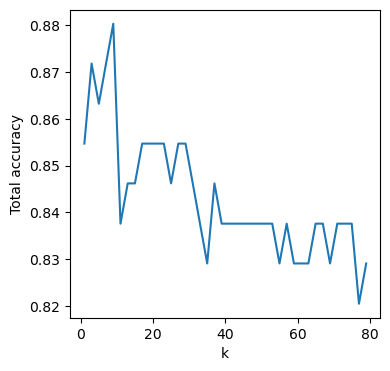

In [76]:
ks = []
accuracy = []
for k in range(1, 80, 2):
    confusion_mat = get_knn_predictions(X_train, X_test, y_train, y_test, n_neighbors=k)
    # print(f'k value: {k}')
    # print(f'Test error rate: {1 - get_accuracy(confusion_mat):0.4f}')
    # print(confusion_mat)
    # print()
    ks.append(k)
    accuracy.append(get_accuracy(confusion_mat))

_, ax = subplots(figsize=(4, 4))
ax.plot(ks, accuracy)
ax.set_xlabel('k')
ax.set_ylabel('Total accuracy');

**A:** Using variables that seem to have the best correlation with the response:
- *Logistic Regression* has the best performance at $90\%$
- *KNN* with $k = 7$ follows at $88\%$
- *LDA* at $86\%$
- *NB* at $82\%$
- *QDA* with lowest accuracy at $78\%$